In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from matplotlib import cbook

In [2]:
# Create a DataFrame with 100 rows
df = pd.DataFrame(index=range(100))

# Generate a categorical column
categories = ['Category A', 'Category B', 'Category C']
df['Category'] = np.random.choice(categories, size=len(df))

# Generate a float column
df['Float'] = np.random.rand(len(df))

# Generate an integer column
df['Integer'] = np.random.randint(0, 100, size=len(df))

# Add missing values to the columns
df.loc[np.random.choice(df.index, size=10), 'Category'] = np.nan
df.loc[np.random.choice(df.index, size=10), 'Float'] = np.nan
df.loc[np.random.choice(df.index, size=10), 'Integer'] = np.nan

# Add outliers to the columns
df.loc[np.random.choice(df.index, size=10), 'Float'] = np.random.uniform(100, 1000, size=10)
df.loc[np.random.choice(df.index, size=10), 'Integer'] = np.random.randint(1000, 10000, size=10)

In [3]:
df.head()

,Category,Float,Integer
0,Category A,0.161382,98.0
1,Category A,894.846227,55.0
2,Category A,0.754565,25.0
3,Category B,0.242374,30.0
4,Category B,0.305707,15.0


In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  91 non-null     object 
 1   Float     93 non-null     float64
 2   Integer   92 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [6]:
df.isnull().sum()

Category    9
Float       7
Integer     8
dtype: int64

In [7]:
# category column missing values

df["Category"].value_counts()

Category
Category A    37
Category B    28
Category C    26
Name: count, dtype: int64

In [8]:
missing_category_slice = df.loc[df["Category"].isnull()]

missing_category_slice

,Category,Float,Integer
12,NaN,0.093601,54.0
14,NaN,338.036811,34.0
29,NaN,0.249182,33.0
35,NaN,0.149238,72.0
44,NaN,0.705110,25.0
71,NaN,0.613313,59.0
72,NaN,0.021782,52.0
76,NaN,0.265577,64.0
87,NaN,0.332788,8601.0


In [9]:
# replace a specific value
df.loc[49, "Category"] = "Category C"

In [10]:
df.loc[49]

Category    Category C
Float         0.795707
Integer            NaN
Name: 49, dtype: object

In [11]:
 # Use loc to replace missing values in the 'Category' column 
# if the value of the 'Float' column is greater than 200

df.loc[df["Float"] > 200, "Category"] = "Category A"

In [12]:
# Use loc to replace missing values in the 'Category' column based on multiple conditions
df.loc[(df['Float'] < 180) & (df['Integer'] > 10), 'Category'] = 'Category A'

In [13]:
df.isnull().sum()

Category    0
Float       7
Integer     8
dtype: int64

## Using Fillna

In [14]:
df['Category'].mode()

0    Category A
Name: Category, dtype: object

In [15]:
# Use fillna to replace the remaining missing values in the 'Category' column with the mode
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Category    0
Float       7
Integer     8
dtype: int64

In [17]:
s = pd.Series([14, np.nan, np.nan, 10])
s

0    14.0
1     NaN
2     NaN
3    10.0
dtype: float64

In [18]:
# backward fill
s.bfill()

0    14.0
1    10.0
2    10.0
3    10.0
dtype: float64

In [19]:
d = pd.Series([14, np.nan, np.nan, 10])
d

0    14.0
1     NaN
2     NaN
3    10.0
dtype: float64

In [20]:
# backward fill 
d.ffill()

0    14.0
1    14.0
2    14.0
3    10.0
dtype: float64

In [21]:
# Use fillna to fill missing values in the DataFrame using backward fill
df["Float"].fillna(method='bfill', inplace=True)

C:\Users\J\AppData\Local\Temp\ipykernel_10368\3407838213.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Float"].fillna(method='bfill', inplace=True)


In [22]:
# replacing missing values with mean 
df["Integer"].fillna(df["Integer"].mean(), inplace = True)

In [23]:
df.isnull().sum()

Category    0
Float       0
Integer     0
dtype: int64

## OutLiers

c:\Users\J\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


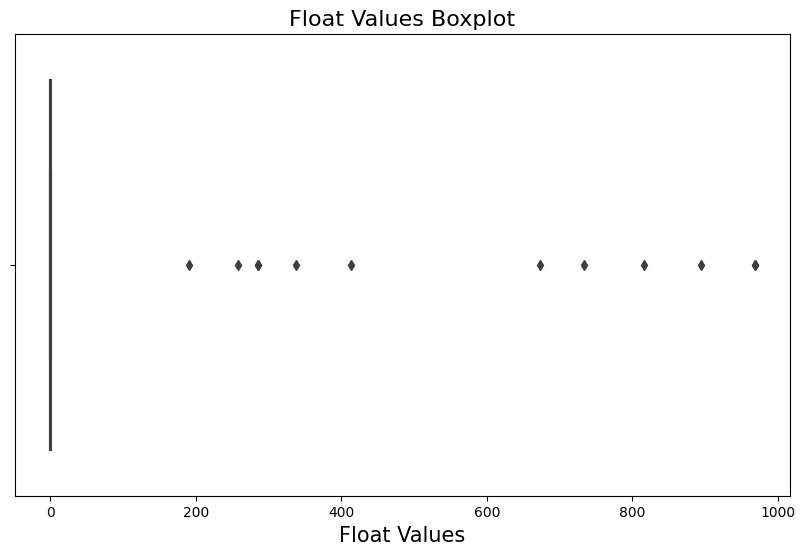

FileNotFoundError: [Errno 2] No such file or directory: 'Data/images/floatOutliers.png'

In [24]:
# we can use a box plot to identify outliers

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6))

sns.boxplot(x="Float", data=df, ax=ax)
ax.set_xlabel("Float Values", fontsize=15)
ax.set_title("Float Values Boxplot", fontsize=16)

plt.show()

fig.savefig("Data/images/floatOutliers.png")